# Tugas


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
from sklearn import datasets
from sklearn.decomposition import PCA

# Memuat dataset Iris
iris = datasets.load_iris()
X = iris.data
y_true = iris.target

In [ ]:
# Membuat objek HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(X)

# Mendapatkan label hasil clustering
# Label -1 menandakan noise
labels = clusterer.labels_

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Menghitung jumlah cluster (mengabaikan noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# Menghitung jumlah titik noise
n_noise = list(labels).count(-1)

print(f"Jumlah cluster yang terbentuk: {n_clusters}")
print(f"Banyaknya noise: {n_noise} titik data")

Jumlah cluster yang terbentuk: 2
Banyaknya noise: 0 titik data


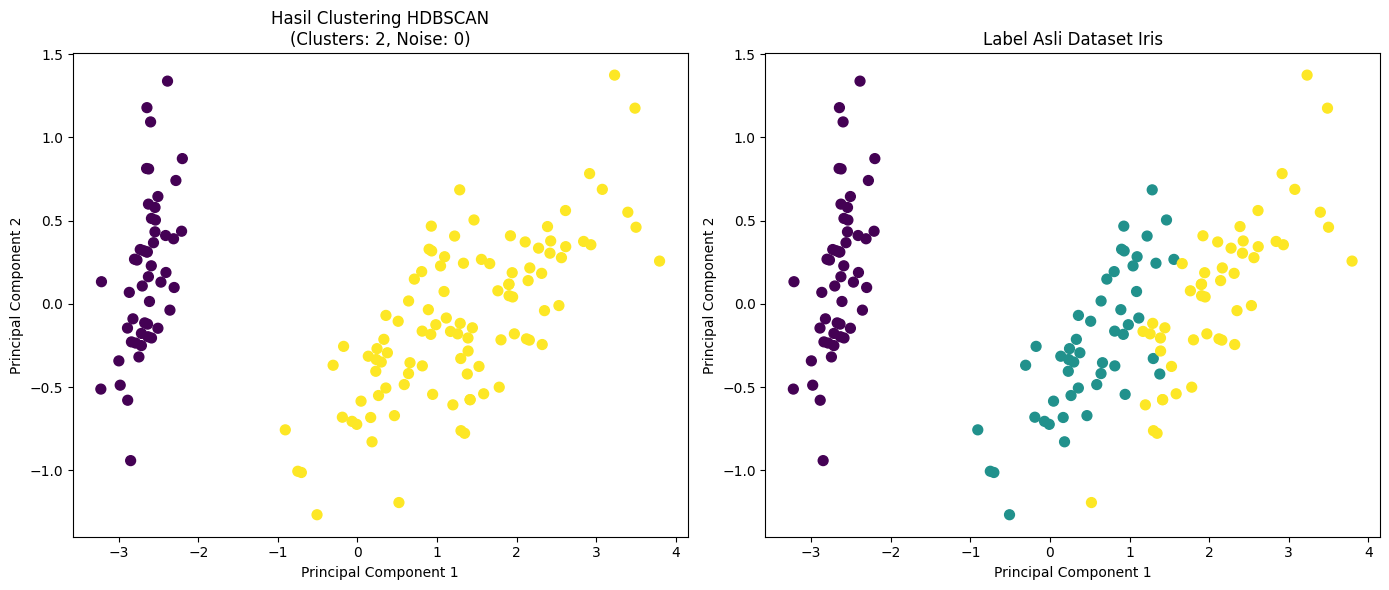

In [ ]:
# Reduksi dimensi ke 2D menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Membuat subplot untuk perbandingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Hasil Clustering HDBSCAN
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
ax1.set_title(f'Hasil Clustering HDBSCAN\n(Clusters: {n_clusters}, Noise: {n_noise})')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

# Plot 2: Label Asli (Ground Truth)
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', s=50)
ax2.set_title('Label Asli Dataset Iris')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

Visualisasi PCA menunjukkan bahwa data iris terbagi menjadi dua kelompok utama yang mencakup sebagian besar variasinya. Hasil clustering HDBSCAN juga menghasilkan dua cluster tanpa noise: satu mewakili kelas setosa yang terpisah jelas, dan satu lagi menggabungkan versicolor serta virginica karena pola keduanya berdekatan. Hal ini mencerminkan keterbatasan PCA yang bersifat linier dalam memisahkan kelas dengan karakteristik serupa.

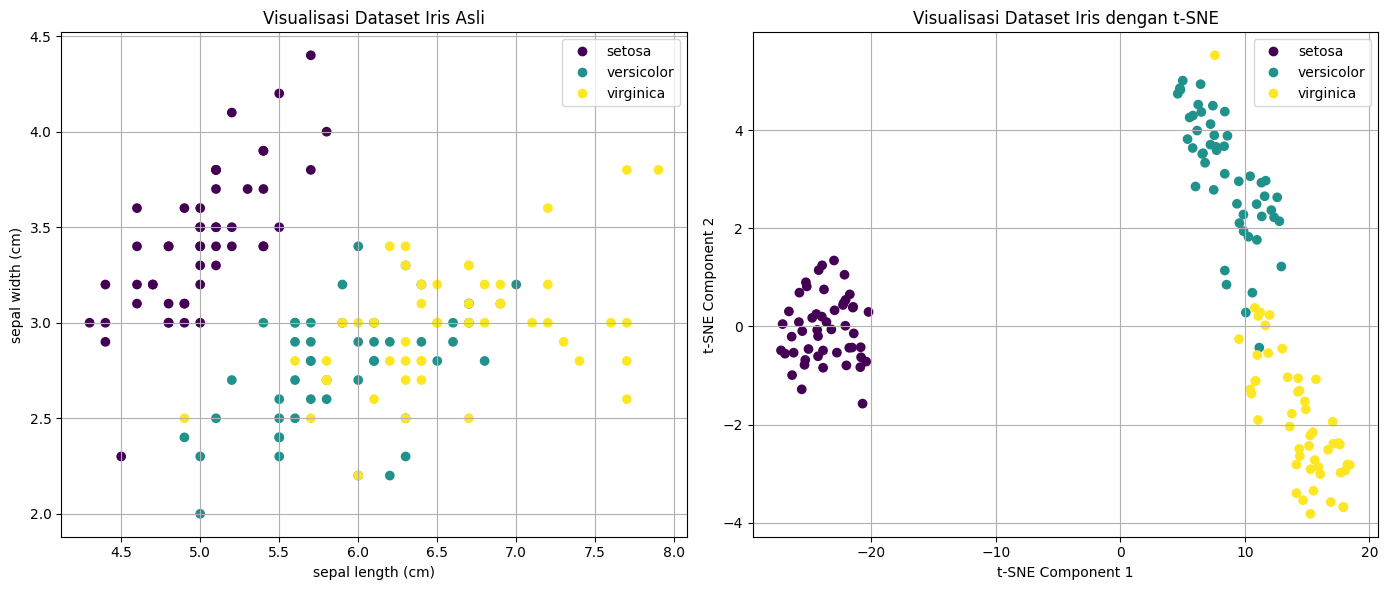

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Melakukan fitting dan transformasi data
X_tsne = tsne.fit_transform(X)

# Membuat subplot untuk perbandingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Visualisasi data iris asli (sebelum t-SNE)
scatter_original = ax1.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis')
ax1.legend(handles=scatter_original.legend_elements()[0], labels=iris.target_names.tolist())
ax1.set_title('Visualisasi Dataset Iris Asli')
ax1.set_xlabel(iris.feature_names[0]) # Assuming first two features for visualization
ax1.set_ylabel(iris.feature_names[1])
ax1.grid(True)

# Plot 2: Visualisasi Hasil t-SNE
scatter_tsne = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_true, cmap='viridis')

# Menambahkan legenda sesuai dengan kelas asli
ax2.legend(handles=scatter_tsne.legend_elements()[0], labels=iris.target_names.tolist())
ax2.set_title('Visualisasi Dataset Iris dengan t-SNE')
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
ax2.grid(True)

plt.tight_layout()
plt.show()

Visualisasi t-SNE menghasilkan tampilan dua dimensi yang lebih jelas dengan tiga cluster sesuai label asli: setosa, versicolor, dan virginica. Berbeda dari PCA, t-SNE berhasil memisahkan versicolor dan virginica karena sifatnya yang non-linear dan kemampuannya mempertahankan kedekatan antar titik, sehingga pola cluster lebih mencerminkan struktur alami data.